# **Linear Regression: Ordinary Least Square (OLS) vs Stochastic Gradient Descent (SGD)**


---


Linear Regression is a linear approach to modelling the relationship between a single dependent and one or more independent variable(s)

Simple Linear Regression is a Linear Regression which only have 1 independent variable (usually x as independent/input, and y as dependent/output), so the model can be written as:

$ y = \alpha + \beta x$

$x$ and $y$ are the independent variable and dependent variable found inside the dataset / sample data

$\alpha$ (a.k.a intercept) and $\beta$ (a.k.a. slope) are both a constant value that are not included in the dataset/sample data

So, the question is "How to determine the value of $\alpha$ and $\beta$?" The answer is we choose a specific $\alpha$ and $\beta$ so that the Sum Squared Residual is minimized.


There are 2 methods to find the value of $\alpha$ and $\beta$:


1.   Ordinary Least Square (OLS)
2.   Gradient Descent and Stochastic Gradient Descent (SGD)







## **Preparing The Dataset**

To compare the 2 methods, we need to get the dataset first. Later, the 2 methods will work on the same data so that we can compare the result.

This dataset contains 100 rows of x (independent variable) and y (dependent variable)

            x          y
0   32.502345  31.707006
1   53.426804  68.777596
2   61.530358  62.562382
3   47.475640  71.546632
4   59.813208  87.230925
..        ...        ...
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958
99  25.128485  53.454394

[100 rows x 2 columns]


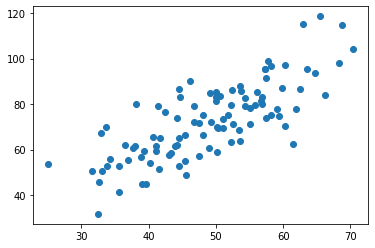

In [ ]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Input data
url = 'https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv'
dataset = pd.read_csv(url, names = ["x","y"])
print(dataset)
X = dataset.iloc[:, 0]
Y = dataset.iloc[:, 1]
#Visualizing the data set
plt.scatter(X, Y)
plt.show()

Now that our data is ready, let's move to the methods

## **A. Ordinary Least Square Method**

Using ordinary least square method, we can directly find the value of $\alpha$ and $\beta$ using mathematics approach. This  method involves a lot of calculus (especially partial derivation).

For the sake of simplicity, we won't disscuss how to get the formula of the best / optimal $\alpha$ and $\beta$. If you want to know more about the steps getting this formula, please read [this article](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line). It's described clearly there.

### **1. Finding $\beta$ value**

First, we calculate the value of $\beta$ using this formula:

$\beta = \frac{\sum_{i=1}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}$

$\beta = \frac{Cov(x,y)}{Var(x)}$

$\beta = Corr(x,y)\frac{Std Dev(y)}{StdDev(x)}$

So, to obtain the beta value, we need to calculate the correlation coeficient of x and y, also the standard deviation of both x and y

To make it easier, we can use numpy built-in function to calculate those values.

In [ ]:
#finding Corr(x,y)
X_Y_correlation = np.corrcoef(X, Y)[0,1]
print(X_Y_correlation)

0.7737284998878238


In [ ]:
#finding StdDev(y)
Y_standardDeviation = np.std(Y)
print(Y_standardDeviation)

16.5746871896844


In [ ]:
#finding StdDev(x)
X_standardDeviation = np.std(X)
print(X_standardDeviation)

9.697524963278815


And finally we can calculate the beta value

In [ ]:
#finding beta value
optimal_Beta = X_Y_correlation* (Y_standardDeviation/X_standardDeviation)
print(optimal_Beta)

1.3224310227553604


### **2. Finding $\alpha$ value**

Formula for $\alpha$:

$\alpha = \overline{y} - \beta \overline{x}$

Notice that we need beta to calculate alpha, so that's why we calculate the beta value first.

So, to obtain the alpha value, we need to calculate the mean value of both x and y

To make it easier, we can use numpy built-in function to calculate those values.

In [ ]:
#finding mean value of x and y
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print(X_mean,Y_mean)

48.95834146155939 72.73505055368646


In [ ]:
#finding alpha value
optimal_Alpha = Y_mean - optimal_Beta* X_mean
print(optimal_Alpha)

7.991020982270314


### **3. Evaluating**

Now let's see the result of our linear regression model

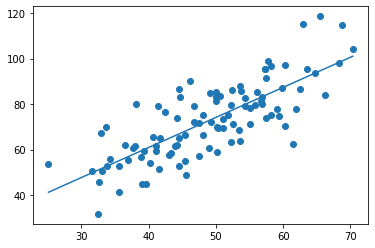

y = 7.991020982270314 + 1.3224310227553604x


In [ ]:
X_pred_ols = np.linspace(np.min(X), np.max(X), 1000)
Y_pred_ols = optimal_Alpha + optimal_Beta*X_pred_ols

plt.scatter(X,Y)
plt.plot(X_pred_ols,Y_pred_ols)

plt.show()
print("y = {} + {}x".format(optimal_Alpha,optimal_Beta))

It looks pretty good right? But, to make it more scientific, let's calculate the Root Mean Square Error (RMSE) using this formula:

$RMSE = \sqrt{\sum_{i=1}^{n} \frac{ (y_{predicted}- y_{actual})^2}{n}}$

In [ ]:
def calculateRMSE(predicted, actual):
    nominator = 0
    size = int(len(actual))
    for i in range(size):
      nominator += (predicted[i]-actual[i])**2

    result = (nominator/size)**0.5

    return result

Y_pred = optimal_Alpha + optimal_Beta*X
calculateRMSE(Y_pred,Y)

10.500351587742816

## **B. Stochastic Gradient Descent Method**

Stochastic Gradient Descent process is completely different compared to OLS method. In this method, we go through "trial and error", which is updating the value of alpha and beta based on the current performance. You can read more detailed information about linear SGD [here](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843).

Basically, there are several steps of stochastic gradient descent:

### **1. Initializing Values**

There are 4 values that we need to intialize:

(there is no single correct way to determine the value, it's based on experience and trial & error)

1.   Alpha: 0
2.   Beta: 0
3.   Learning Rate: 0.0001
4.   epochs: 1000

notice that when alpha = 0 and beta = 0, our starting model is y = 0, which means the line is starting to raise from a flat x-axis.



In [ ]:
alpha = 0
beta = 0
learning_Rate = 0.0001 
epochs = 1000 

### **2. Backpropagation**

1 epoch means we iterate our dataset from the first row until the last row. Because we are using SGD, then we backprop (updating the weight of alpha and beta) after each row.

In pseudocode:


> For each epoch: <br>
&emsp; For each row: <br>
&emsp;&emsp; Backpropagation (update the value of beta and alpha)

To update the value of alpha and beta, we use this formula:

(check [this](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843#3b4c) for the detailed explanation of the formula)

$Loss = (y_{predicted} - y_{actual})^2$

$\frac{\partial Loss}{\partial \beta} = 2(y_{predicted}-y_{actual})x$

$\frac{\partial Loss}{\partial \alpha} = 2(y_{predicted}-y_{actual})$

$\alpha \leftarrow \alpha - \eta \frac{\partial Loss}{\partial \alpha}$

$\beta \leftarrow \beta - \eta \frac{\partial Loss}{\partial \beta}$

where $\eta$ is the learning rate (0.0001)



In [ ]:
#create a list to record the RMSE for later evaluation
rmse_record = []
size = int(len(Y))
for j in range(epochs):
    for i in range(size):
        Y_pred = alpha + beta*X[i]  # The current predicted value of Y
        D_beta = (2) * (Y_pred- Y[i]) * X[i]   # Derivative of beta
        D_alpha = (2) * (Y_pred- Y[i])  # Derivative of alpha
        beta = beta - learning_Rate * D_beta  # Update beta
        alpha = alpha - learning_Rate * D_alpha  # Update alpha
    #record RMSE for evaluation
    temp_prediction = alpha + X*beta
    rmse_record.append(calculateRMSE(temp_prediction,Y)) 

print(alpha, beta)

4.662607965242593 1.4726185464385981


### **3. Evaluating**

Now let's see the result of our linear regression model

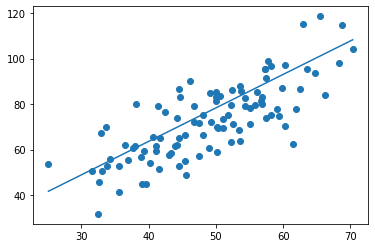

y = 4.662607965242593 + 1.4726185464385981x


In [ ]:
X_pred_sgd = np.linspace(np.min(X), np.max(X), 1000)
Y_pred_sgd = alpha + beta*X_pred_sgd

plt.scatter(X,Y)
plt.plot(X_pred_sgd,Y_pred_sgd)
plt.show()
print("y = {} + {}x".format(alpha,beta))

It looks pretty close to OLS method right? But, to make it more scientific, let's calculate the Root Mean Square Error (RMSE) using this formula:

$RMSE = \sqrt{\sum_{i=1}^{n} \frac{ (y_{predicted}- y_{actual})^2}{n}}$

In [ ]:
Y_pred = alpha + beta*X
calculateRMSE(Y_pred,Y)

11.339108239948436

So the result is pretty close to the OLS method! Now let's see the performance progress for each epoch

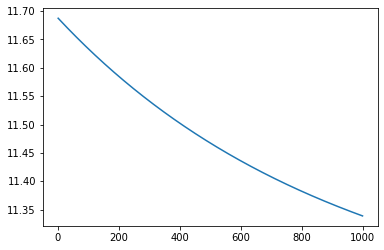

In [ ]:
X_evaluation = np.array(range(1,epochs))
Y_evaluation = [ rmse_record[i] for i in range(1,epochs)]
plt.plot(X_evaluation,Y_evaluation)

Notice that the line is still declining after 1000 epoch, so it is possible to score closer to OLS if we increase the epoch

## **Comparison**

Now the question is "Why do we need to use SGD method if OLS gives us straight-forward and optimal result while SGD is slower and not optimal?"

Short Answer: OLS is much slower compared to SGD when dealing with a large multivariable dataset (more than 1 independent variables)

Long Answer:

For multivariable linear regression, the theta (similar to alpha and beta in simple linear regression) can be calculated using this formula:

$\theta =(X^TX)^{−1}X^T y$

<br>

where:

$\theta $ is the matrix of theta ($\theta_0$ is the bias)

$X$ is the matrix of independent variables value for each row ($x_0$ is set to 1 for bias)

$Y$ is the matrix of dependent variable value

<br>

if $m$ denotes the number of rows/sample and $n$ denotes the number of independent variables, then:

$\theta$ is n x 1 matrix

$X$ is m x (n+1) matrix

$Y$ is n x 1 matrix

<br>

Take a look at the example below:

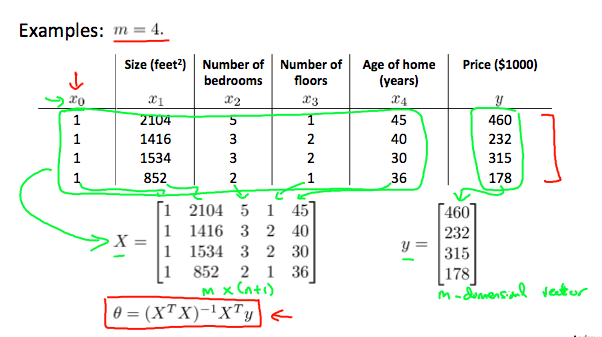

Now, let's take a look closely at this part $X^TX$. It is a matrix multiplication and that's the problem. Why? First, take a look at this matrix multiplication source code:
 > 

In [ ]:
# Program to multiply two matrices using nested loops

# 3x3 matrix
X = [[12,7,3],
    [4 ,5,6],
    [7 ,8,9]]
# 3x4 matrix
Y = [[5,8,1,2],
    [6,7,3,0],
    [4,5,9,1]]
# result is 3x4
result = [[0,0,0,0],
         [0,0,0,0],
         [0,0,0,0]]

# iterate through rows of X
for i in range(len(X)):
   # iterate through columns of Y
   for j in range(len(Y[0])):
       # iterate through rows of Y
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]

for r in result:
   print(r)

[114, 160, 60, 27]
[74, 97, 73, 14]
[119, 157, 112, 23]


Notice that the complexity of matrix multiplication is O($n^3$), which requires a lot of time as the data gets larger.

Meanwhile, the complexity of gradient descent method is O($kn^2$), where k is the epoch. This is relatively much faster than the OLS method.

So, that's why gradient descent is much better for multivariable linear regression with a lot of independent variables.

Take a look at [this](https://www.coursera.org/learn/machine-learning/lecture/2DKxQ/normal-equation) great lecture video by Andrew Ng. he explains it very clearly.

##**Conclusion**

OLS Advantage:

1.   Guaranteed Optimum Result
2.   Straight-Forward Technique
3.   No iteration needed

OLS Disadvantage:

1.   Has a O($n^3$) complexity, which will suffer a lot when the number of independent variable is large

(Stochastic) Gradient Descent Advantage:
1.   Has a O($kn^2$) complexity, works much faster with a large number of independent variable compared to OLS method.

(Stochastic) Gradient Descent Disadvantage:
1.   Need to determine the learning rate and epoches, which requires experience in this technique
2.   Doesn't guarantee global optimum result
3.   Much slower dealing with simple problem

**So, always use OLS when the number of independent variable is small (like in this case), otherwise use gradient descent.**
